# CSCI E-89 Deep Learning
## LAB 03: Keras Intro - MNIST Classifier

### Introduction to Keras

<b>Keras</b> is a deep learning API written in Python and capable of running on top
of either JAX,TensorFlow, or PyTorch.

Essentially a high-level deep learning library used for building neural networks.

With the release of <b><span style="color:red;">Keras 3.0 it now supports JAX, Tensorflow & Pytorch as backends.</span></b>

Starting <b><span style="color:red;">Keras 3</span></b>, any Keras model can be instantiated as a PyTorch Module, can be
exported as a TensorFlow Saved Model, or can be instantiated as a stateless JAX
function. There is cross framework compatibility.

<b><span style="color:black;">Keras 2 only supports tensorflow as a backend.</span></b>


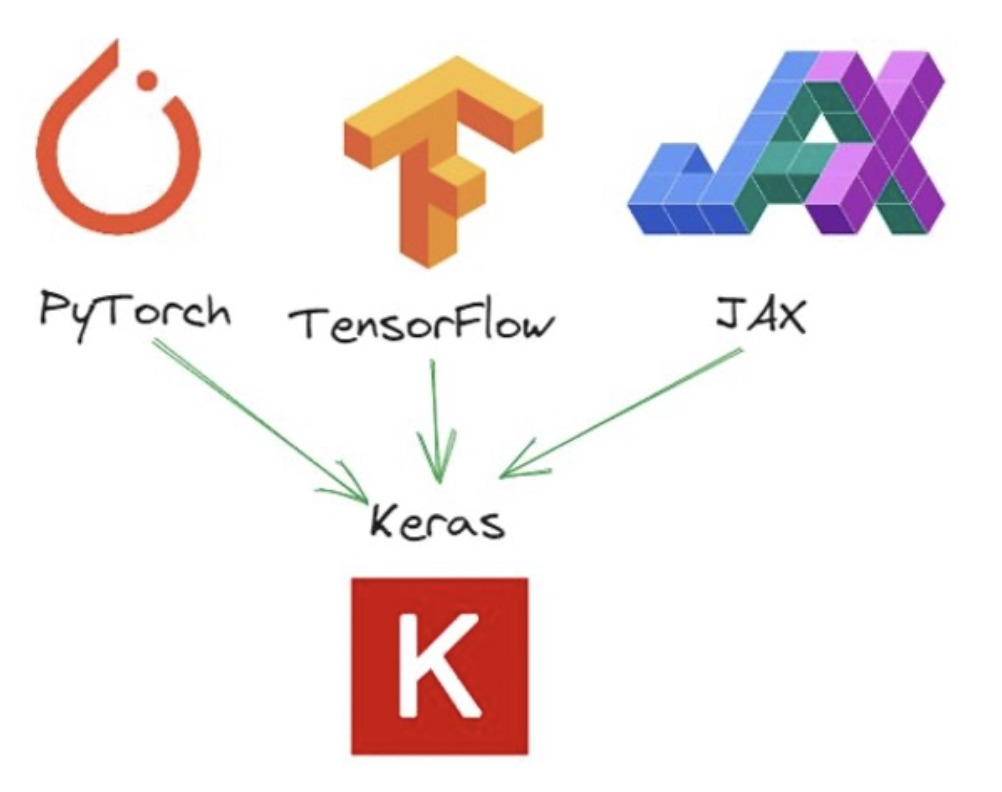

<b>JAX</b> is a Python library for accelerator-oriented array
computation and program transformation, designed for
high-performance numerical computing and large-scale
machine learning.

<b>TensorFlow</b> is an open-source platform developed by
Google for building and deploying machine learning
(ML) and deep learning (DL) models. It's especially
popular for neural networks and is widely used in
research and production.

<b>PyTorch</b> is an open-source deep learning framework
developed by Meta (Facebook) that provides a flexible
and intuitive interface for building and training neural
networks using dynamic computation graphs.
    

### Installation of Tensorflow and Keras

<span style="color:red;"><b>Install TensorFlow 2</b></span>

Starting TensorFlow 2.16, doing -

pip install tensorflow will install Keras 3.

When you have TensorFlow >= 2.16 and Keras 3, then by default

from tensorflow import keras will be Keras 3.

TensorFlow 2 packages require a pip version >19.0 (or >20.3 for macOS).

Requires the latest pip

pip install --upgrade pip

<b>Current stable release for CPU</b>

pip install tensorflow

Only for <b>MACOS – Apple Silicon</b> Do outside Conda for M4

python -m pip install tensorflow-metal

<span style="color:red;"><b>Install Keras 3</span></b>

pip install --upgrade keras

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print (tf.__version__)
print (keras.__version__)

2.20.0
3.11.3


### Keras MNIST 1
<b>Objective</b> : This Notebook introduces Keras API - Vanilla Notebook that goes over set of steps in a standard ML problem
             

<b>Data</b> - Your data needs to be stored as NumPy arrays or as a list of NumPy arrays
<b>Keras Data Sets</b>

<b>Preprocessing</b> - One-Hot Encoding

<b>Standardization, Normalization</b>

<b>Model Architecture</b> - Build a sequential model 

<b>Compile the model</b>

<b>Train the model</b>

<b>Evaluate the model</b>

<b>Predict</b>


#### Load MNIST Data 
##### http://yann.lecun.com/exdb/mnist/

#The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. 
#The digits have been size-normalized and centered in a fixed-size image.

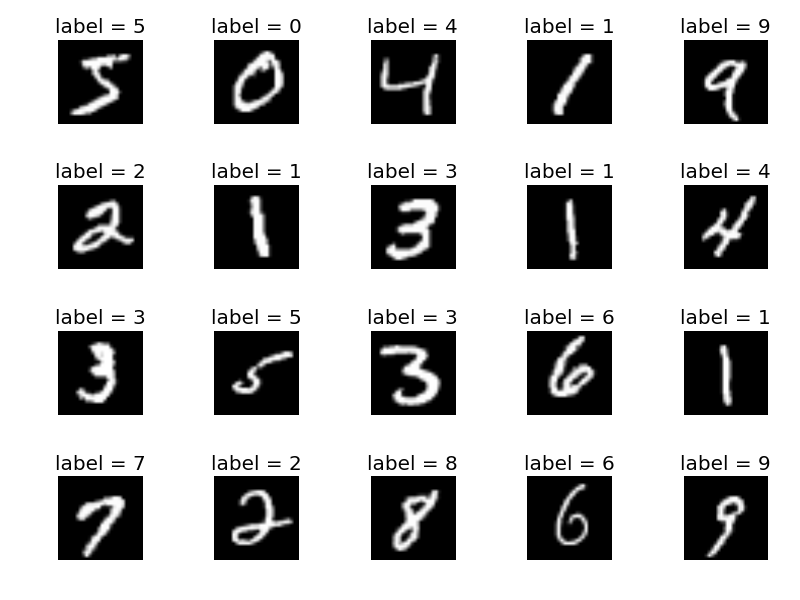

In [4]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0         # Convert the samples from integers to floating-point numbers

In [5]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [6]:
# How does our Data look ? These are images converted to binary pixel values in a 28 x 28 form for number "4" 

x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
y_train[2]

np.uint8(4)

#### Build the model 

keras.models.Sequential - represents a linear stack of layers, allowing you to build neural networks by adding layers one by one. 

keras.layers.Flatten - flattens the input. Does not affect the batch size.

keras.layers.Dense - represents a fully connected neural network layer. The units parameter defines the number of neurons in the layer. An activation function can be applied to the output of the linear transformation, introducing non-linearity into the model. Common activation functions include ReLU, sigmoid, and softmax.

keras.layers.Dropout - applies dropout to the input. rate: Float between 0 and 1. Fraction of the input units to drop.

The last Dense layer - 10 outputs (#0-9 digits)


In [ ]:
# Build Model
#tf.keras.models.Sequential represents a type of Keras model in TensorFlow 
#that is a linear stack of layers.
model = keras.models.Sequential([
  keras.Input(shape=(28,28)),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.5),  
  keras.layers.Dense(10) #0-9
])



#### Summarize the Model

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

<b>Calculation of Trainable Parameters -</b>

784*128 + 128 = 100,480

128*64 + 64 = 8256

64*10 + 10 = 650

Trainable Parameters - 100,480 + 8256 + 650 = 109,386



#### Compilation

Before training a model, you need to configure the learning process, which is done via the `compile` method. It receives three arguments:

- an optimizer. This could be the string identifier of an existing optimizer (such as `rmsprop` or `adagrad`), or an instance of the `Optimizer` class. 
- a loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function. 
- a list of metrics. For any classification problem you will want to set this to `metrics=['accuracy']`. 

In [10]:
# logits
# The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily 
# then passed to a normalization function. If the model is solving a multi-class classification problem, logits 
# typically become an input to the softmax function. The softmax function then generates a vector of (normalized) 
# probabilities with one value for each possible class.

#Computes the crossentropy loss between the labels and predictions.
#Use this crossentropy loss function when there are two or more label classes. 
#We expect labels to be provided as integers.

#If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. 

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

#### Model Training
##### The Model.fit method adjusts the model parameters to minimize the loss

In [11]:
history = model.fit(x_train, y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 563us/step - accuracy: 0.8746 - loss: 0.4251
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.9411 - loss: 0.2095
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9534 - loss: 0.1655
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.9586 - loss: 0.1453
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.9638 - loss: 0.1287


In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

#### Model Evaluation

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 525us/step - accuracy: 0.9725 - loss: 0.0885


[0.08846031129360199, 0.9725000262260437]

In [14]:
predictions = model.predict(x_test[94:95])

print("Raw Predictions:\n")
print(predictions,"\n")

print("Rounded Probabilities:\n")
print(np.round(predictions,2),"\n")

print("Predicted Labels:\n")
print(np.argmax(predictions, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Raw Predictions:

[[-5.669303    7.039905   -2.3029914  -5.895841   -2.4999704  -3.0653877
  -0.62452346 -3.5863595   0.7299889  -4.435089  ]] 

Rounded Probabilities:

[[-5.67  7.04 -2.3  -5.9  -2.5  -3.07 -0.62 -3.59  0.73 -4.44]] 

Predicted Labels:

[1]


In [15]:
predictions.dtype

dtype('float32')

In [16]:
y_test[94:95]

array([1], dtype=uint8)

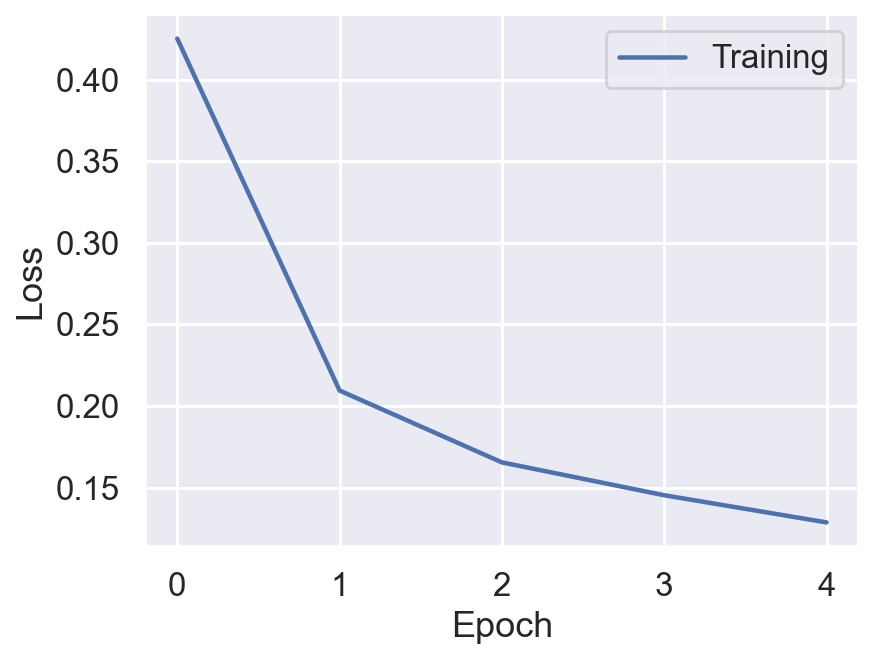

In [17]:
sns.set_context("talk")
plt.plot(history.history['loss'], label="Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()